In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**Importing Dependencies**

In [2]:
import pandas as pd
import numpy as np
import csv
import random

**Assign Directory**

In [3]:
abandoned_ndvi = pd.read_csv('/content/drive/MyDrive/CSV_fyp/abandoned/ndvi_yala_abandoned_2022_dataset.csv')
abandoned_lswi = pd.read_csv('/content/drive/MyDrive/CSV_fyp/abandoned/lswi_yala_abandoned_2022_dataset.csv')

cultivated_ndvi = pd.read_csv('/content/drive/MyDrive/CSV_fyp/cultivated/ndvi_yala_cultivated_2022_dataset.csv')
cultivated_lswi = pd.read_csv('/content/drive/MyDrive/CSV_fyp/cultivated/lswi_yala_cultivated_2022_dataset.csv')

## **Pre-processing**



In [4]:
# drop the label columns in both dataframes
# axis 1 to drop columns
abandoned_ndvi_values = abandoned_ndvi.drop(['label'],axis=1)
abandoned_lswi_values = abandoned_lswi.drop(['label'],axis=1)

cultivated_ndvi_values = cultivated_ndvi.drop(['label'],axis=1)
cultivated_lswi_values = cultivated_lswi.drop(['label'],axis=1)

In [5]:
abandoned_ndvi_values.head()

,day0,day9,day18,day27,day36,day45,day54,day63,day72,day81,day90,day99,day108,day117,day126,day135,day144,day153,day162,day171
0,0.63,0.65,0.70,0.68,0.68,0.69,0.69,0.70,0.69,0.61,0.58,0.53,0.61,0.65,0.68,0.64,0.59,0.57,0.56,0.56
1,0.63,0.66,0.71,0.69,0.69,0.70,0.70,0.71,0.70,0.60,0.58,0.53,0.61,0.65,0.67,0.64,0.59,0.57,0.56,0.55
2,0.60,0.67,0.72,0.68,0.68,0.69,0.69,0.70,0.69,0.59,0.58,0.54,0.64,0.64,0.66,0.64,0.59,0.57,0.56,0.54
3,0.59,0.67,0.72,0.67,0.67,0.68,0.68,0.71,0.70,0.59,0.56,0.54,0.64,0.65,0.67,0.63,0.59,0.57,0.55,0.53
4,0.59,0.66,0.70,0.67,0.67,0.67,0.67,0.70,0.70,0.59,0.55,0.54,0.63,0.65,0.66,0.61,0.59,0.58,0.56,0.53


In [6]:
abandoned_lswi_values.head()

,day0,day8,day17,day26,day34,day43,day52,day60,day69,day78,day86,day95,day104,day112,day121,day130,day138,day147,day156,day165
0,0.34,0.35,0.35,0.35,0.36,0.33,0.31,0.28,0.26,0.24,0.22,0.21,0.24,0.27,0.30,0.3,0.28,0.26,0.24,0.14
1,0.34,0.35,0.35,0.35,0.36,0.33,0.31,0.28,0.26,0.24,0.22,0.21,0.24,0.27,0.30,0.3,0.28,0.26,0.24,0.14
2,0.34,0.35,0.35,0.35,0.36,0.33,0.31,0.28,0.26,0.24,0.22,0.21,0.24,0.27,0.30,0.3,0.28,0.26,0.24,0.14
3,0.34,0.35,0.35,0.35,0.36,0.33,0.31,0.28,0.26,0.24,0.22,0.21,0.24,0.26,0.29,0.3,0.28,0.26,0.24,0.14
4,0.34,0.35,0.35,0.35,0.36,0.33,0.31,0.28,0.26,0.23,0.22,0.20,0.23,0.26,0.29,0.3,0.28,0.26,0.24,0.13


In [7]:
# dataframe with only column to np array
abandoned_ndvi_array = np.array(abandoned_ndvi_values)
abandoned_lswi_array = np.array(abandoned_lswi_values)

cultivated_ndvi_array = np.array(cultivated_ndvi_values)
cultivated_lswi_array = np.array(cultivated_lswi_values)

In [8]:
print('ab ndvi -',len(abandoned_ndvi_array))
print('ab lstw -',len(abandoned_lswi_array))
print('cu ndvi -',len(cultivated_ndvi_array))
print('cu lstw -',len(cultivated_lswi_array))

ab ndvi - 4758
ab lstw - 4800
cu ndvi - 12008
cu lstw - 11680


In [9]:
number_of_rows_abandoned = len(abandoned_ndvi_array) if len(abandoned_ndvi_array) <= len(abandoned_lswi_array) else len(abandoned_lswi_array)
number_of_rows_cultivated = len(cultivated_ndvi_array) if len(cultivated_ndvi_array) <= len(cultivated_lswi_array) else len(cultivated_lswi_array)

print('ab',number_of_rows_abandoned)
print('cu',number_of_rows_cultivated)

ab 4758
cu 11680


### **Re-arranging data as [NDVI,LSWI] pairs**

#### **Abandoned Paddy Lands**

In [10]:
abandoned_ndvi_lswi_all_pixels=[]

for i in range(number_of_rows_abandoned):

  abandoned_ndvi_lswi_single_pixel=[]

  for j in range(len(abandoned_ndvi_array[i])):

    ndvi_lswi_per_day=[abandoned_ndvi_array[i][j],abandoned_lswi_array[i][j]]

    abandoned_ndvi_lswi_single_pixel.append(ndvi_lswi_per_day)

  abandoned_ndvi_lswi_all_pixels.append(abandoned_ndvi_lswi_single_pixel)

#### **Cultivated Paddy Lands**

In [11]:
cultivated_ndvi_lswi_all_pixels=[]

for i in range(number_of_rows_cultivated):

  cultivated_ndvi_lswi_single_pixel=[]

  for j in range(len(cultivated_ndvi_array[i])):

    ndvi_lswi_per_day=[cultivated_ndvi_array[i][j],cultivated_lswi_array[i][j]]

    cultivated_ndvi_lswi_single_pixel.append(ndvi_lswi_per_day)

  cultivated_ndvi_lswi_all_pixels.append(cultivated_ndvi_lswi_single_pixel)

### **Randomising Data**

**Function to generate Random Indices**

In [12]:
def generate_random_indices(number_of_rows):
  number_of_samples = 1000

  # array with random indices from 0 to length of data array
  random_indices = []

  while len(random_indices)<number_of_samples:

    # generating random number
    rand = random.randint(0,number_of_rows-1)

    # if generated number is not in the indices array then add to indices array
    if rand in random_indices:
      pass
    else:
      random_indices.append(rand)

  return random_indices

**Generating Random Indices**

In [13]:
abandoned_random_indices = generate_random_indices(number_of_rows_abandoned)
cultivated_random_indices = generate_random_indices(number_of_rows_cultivated)

print('ab -',len(abandoned_random_indices))
print('cu -',len(cultivated_random_indices))

ab - 1000
cu - 1000


### **Create arrays with Randomised Datapoints**

0 - abandoned

1 - cultivated

In [14]:
X = []
Y = []
for i in abandoned_random_indices:
  X.append(abandoned_ndvi_lswi_all_pixels[i])
  Y.append(0)

for j in cultivated_random_indices:
  X.append(cultivated_ndvi_lswi_all_pixels[j])
  Y.append(1)

## **Analyse the Processed Data**

In [15]:
print(np.array(X).shape)

(2000, 20, 2)


In [16]:
X[0:1]

[[[0.59, 0.36],
  [0.63, 0.36],
  [0.68, 0.33],
  [0.67, 0.32],
  [0.66, 0.32],
  [0.65, 0.3],
  [0.64, 0.27],
  [0.66, 0.25],
  [0.66, 0.23],
  [0.57, 0.2],
  [0.56, 0.19],
  [0.51, 0.17],
  [0.6, 0.19],
  [0.57, 0.22],
  [0.62, 0.24],
  [0.59, 0.27],
  [0.57, 0.25],
  [0.56, 0.23],
  [0.55, 0.22],
  [0.54, 0.05]]]

In [17]:
print(np.array(Y).shape)

(2000,)


In [18]:
print(Y[950:1150])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## **Dependencies to Train Model**

In [19]:
#Model
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

#Feature Extraction
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

#Visualisation
from matplotlib import pyplot as plt
import seaborn as sns

Input to LSTM layer must be three-dimensional.

The three dimensions of this input are:

- Samples : One sequence is one sample. A batch is comprised of one or more samples.
  - Size of Training Sample
- Time Steps : One time step is one point of observation in the sample.
  - Number of Days - 20.
- Features : One feature is one observation at a time step.
  - NDVI , LSWI - 2

In [20]:
#splitting to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

#X_train, Y_train = np.array(X_train), np.array(Y_train)
#X_test, Y_test = np.array(X_test), np.array(Y_test)

In [21]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)

(1340, 20, 2)
(660, 20, 2)


In [22]:
Y_train[0:10]

[0, 0, 1, 0, 0, 1, 1, 1, 1, 1]

## **Feature Extraction**

In [23]:
#min_max_scaler = MinMaxScaler()

#min_max_scaler.fit(tn)
#scaled_train = min_max_scaler.transform(tn)
#scaled_test = min_max_scaler.transform(X_train[0])


#stand_scaler = StandardScaler()
#stand_scaler = stand_scaler.fit(X_train)
#X_train_feature = stand_scaler.transform(X_train)

## **Neural Network**

In [24]:
neurons = 64
dropout = 0.8
optmiser = 'adam'
loss_function = 'binary_crossentropy'
epoch = 10
batch = 32

In [25]:
# design network
model = Sequential()
model.add(LSTM(neurons,activation='relu', input_shape=(20,2)))
model.add(Dropout(dropout))
#model.add(Dense(1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optmiser, loss=loss_function, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17152     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 17,217
Trainable params: 17,217
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit network
history = model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, validation_data=(X_test, Y_test), verbose=2, shuffle=True)

Epoch 1/10
42/42 - 3s - loss: 0.6920 - accuracy: 0.4978 - val_loss: 0.6853 - val_accuracy: 0.5136 - 3s/epoch - 79ms/step
Epoch 2/10
42/42 - 1s - loss: 0.6802 - accuracy: 0.5530 - val_loss: 0.6599 - val_accuracy: 0.5864 - 553ms/epoch - 13ms/step
Epoch 3/10
42/42 - 1s - loss: 0.5655 - accuracy: 0.7440 - val_loss: 0.4481 - val_accuracy: 0.9424 - 541ms/epoch - 13ms/step
Epoch 4/10
42/42 - 1s - loss: 0.2283 - accuracy: 0.9343 - val_loss: 0.1207 - val_accuracy: 0.9636 - 558ms/epoch - 13ms/step
Epoch 5/10
42/42 - 1s - loss: 0.1557 - accuracy: 0.9537 - val_loss: 0.0611 - val_accuracy: 0.9773 - 568ms/epoch - 14ms/step
Epoch 6/10
42/42 - 1s - loss: 0.2793 - accuracy: 0.9209 - val_loss: 0.1732 - val_accuracy: 0.9864 - 554ms/epoch - 13ms/step
Epoch 7/10
42/42 - 1s - loss: 0.1104 - accuracy: 0.9821 - val_loss: 0.0267 - val_accuracy: 0.9939 - 565ms/epoch - 13ms/step
Epoch 8/10
42/42 - 1s - loss: 0.0876 - accuracy: 0.9679 - val_loss: 0.0362 - val_accuracy: 0.9909 - 543ms/epoch - 13ms/step
Epoch 9/10


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


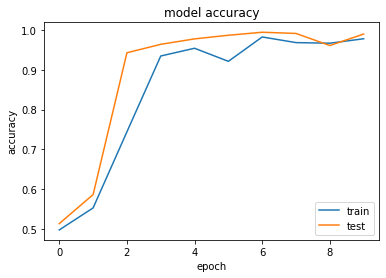

In [27]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

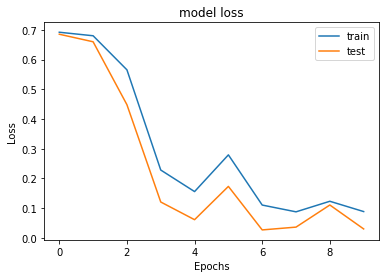

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [29]:
#predict the labels for test data
predictions = model.predict(X_test)


21/21 [==============================] - 0s 5ms/step


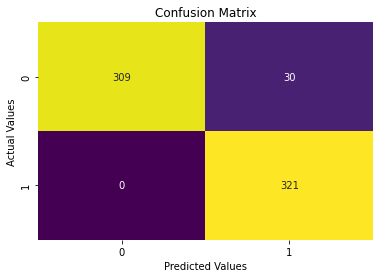

Accuracy Score: 95.45%
 
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       339
           1       0.91      1.00      0.96       321

    accuracy                           0.95       660
   macro avg       0.96      0.96      0.95       660
weighted avg       0.96      0.95      0.95       660



In [30]:
predicted_labels=[]

for i in predictions:
  if i<0.1:
    predicted_labels.append(0)
  else:
    predicted_labels.append(1)


#generate accuracy score
accuracy_of_model = accuracy_score(Y_test, predicted_labels)

#generate classification report
report = classification_report(Y_test, predicted_labels)

#generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_labels)

#set heatmap and color scheme for confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'g', cbar = False, cmap = 'viridis')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy Score:', '{:.2%}'.format(accuracy_of_model))
print(' ')
print(report)

In [31]:
print(predicted_labels[100:200])
print(Y_test[100:200])

[1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [32]:
auc = roc_auc_score(Y_test, predicted_labels)
print(auc)

0.9557522123893805


In [33]:
false_postive_rate, true_positive_rate, _ = roc_curve(Y_test, predicted_labels)

ROC AUC score 0.9557522123893805


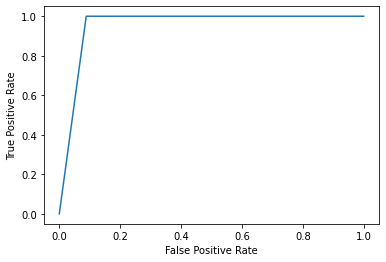

In [34]:
plt.plot(false_postive_rate, true_positive_rate)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('ROC AUC score',auc)
# show the plot
plt.show()